In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtk
import plotly.express as px
import plotly.graph_objects as go

In [226]:
df = pd.read_csv("./datasets/HR_Analytics.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [227]:
new_df = df.loc[:, ['Age', 'Attrition','BusinessTravel','Department','EducationField','EnvironmentSatisfaction',
                     'Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus',
                     'MonthlyIncome','Over18','OverTime','StockOptionLevel','TotalWorkingYears','YearsAtCompany',
                     'YearsInCurrentRole','YearsWithCurrManager']]
new_df['Attrition'] = new_df['Attrition'].replace('Yes', 1).replace('No', 0)


In [228]:
dodi = new_df.copy()
conditions = [(dodi['Age'] >= 18) & (dodi['Age'] <= 20),
              (dodi['Age'] > 20) & (dodi['Age'] <= 25),
              (dodi['Age'] > 25) & (dodi['Age'] <= 30),
              (dodi['Age'] > 30) & (dodi['Age'] <= 35),
              (dodi['Age'] > 35) & (dodi['Age'] <= 40),
              (dodi['Age'] > 40) & (dodi['Age'] <= 45),
              (dodi['Age'] > 45) & (dodi['Age'] <= 50),
              (dodi['Age'] > 50) & (dodi['Age'] <= 55),
              (dodi['Age'] > 55) & (dodi['Age'] <= 60)
             ]

values = ['18-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60']

new_df['Age_Range'] = np.select(conditions, values)
new_df.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,MaritalStatus,MonthlyIncome,Over18,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age_Range
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,Sales Executive,...,Single,5993,Y,Yes,0,8,6,4,5,41-45
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,Research Scientist,...,Married,5130,Y,No,1,10,10,7,7,46-50
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,Laboratory Technician,...,Single,2090,Y,Yes,0,7,0,0,0,36-40
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,Research Scientist,...,Married,2909,Y,Yes,0,8,8,7,0,31-35
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,Laboratory Technician,...,Married,3468,Y,No,1,6,2,2,2,26-30


In [229]:
Attrition = new_df[new_df['Attrition'] == 1]
Attrition.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,MaritalStatus,MonthlyIncome,Over18,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age_Range
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,Sales Executive,...,Single,5993,Y,Yes,0,8,6,4,5,41-45
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,Laboratory Technician,...,Single,2090,Y,Yes,0,7,0,0,0,36-40
14,28,1,Travel_Rarely,Research & Development,Life Sciences,3,Male,2,1,Laboratory Technician,...,Single,2028,Y,Yes,0,6,4,2,3,26-30
21,36,1,Travel_Rarely,Sales,Life Sciences,3,Male,2,1,Sales Representative,...,Single,3407,Y,No,0,10,5,3,3,36-40
24,34,1,Travel_Rarely,Research & Development,Medical,2,Male,3,1,Research Scientist,...,Single,2960,Y,No,0,8,4,2,3,31-35


In [230]:
sorted_age = Attrition.sort_values('Age_Range')
sorted_age.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,MaritalStatus,MonthlyIncome,Over18,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age_Range
296,18,1,Travel_Rarely,Research & Development,Life Sciences,3,Male,3,1,Laboratory Technician,...,Single,1420,Y,No,0,0,0,0,0,18-20
457,18,1,Travel_Frequently,Sales,Marketing,2,Male,3,1,Sales Representative,...,Single,1878,Y,Yes,0,0,0,0,0,18-20
776,20,1,Travel_Frequently,Sales,Marketing,4,Female,3,1,Sales Representative,...,Single,2323,Y,Yes,0,2,2,2,2,18-20
513,20,1,Travel_Rarely,Research & Development,Medical,4,Male,3,1,Research Scientist,...,Single,1009,Y,Yes,0,1,1,0,1,18-20
177,19,1,Travel_Rarely,Research & Development,Life Sciences,2,Male,2,1,Laboratory Technician,...,Single,1102,Y,No,0,1,1,0,0,18-20


In [231]:
plot_df = sorted_age.groupby(sorted_age['JobLevel'], as_index=False).size()
plot_df = plot_df.sort_values(['size'], ascending=False)
plot_df.head()

,JobLevel,size
0,1,143
1,2,52
2,3,32
3,4,5
4,5,5


## Biểu đồ 1:

**Tiêu đề:** Tỉ lệ các cấp độ trong công việc

**Loại biểu đồ:** BarPlot

**Lý do lựa chọn:**
Để so sánh tỉ lệ bỏ việc của những người ở các cấp độ công việc được lưu vào hai thuộc tính là 'Attrition' và 'JobLevel', thì biểu đồ BarPlot là một lựa chọn phù hợp. Vì BarPlot là một loại biểu đồ thống kê hiển thị dữ liệu dưới dạng các cột có chiều cao khác nhau, trong đó chiều cao của cột sẽ đại diện cho giá trị lượng của một biến.

**Trực quan hóa:**

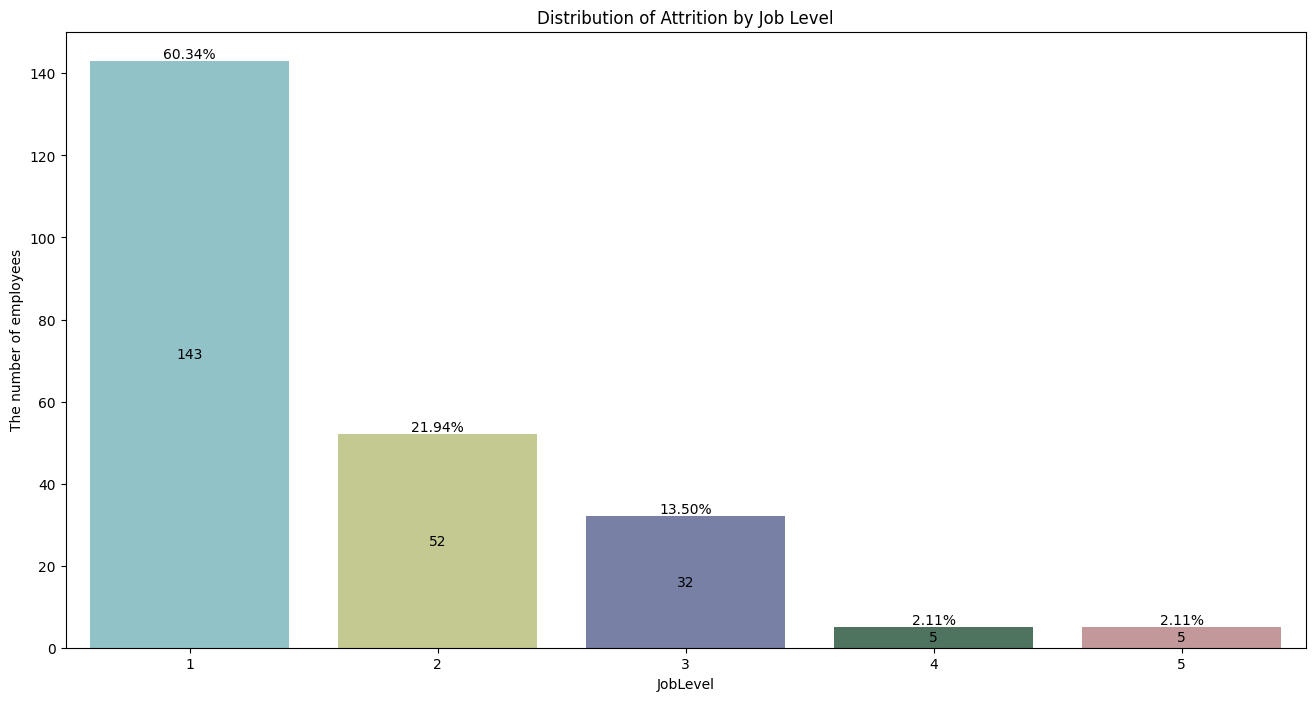

In [232]:
col=['#88C9D1', '#CCD188', '#707BAD', '#48795E','#C99193']
f, ax = plt.subplots(1, figsize=(16,8))
bars = sns.barplot(x=plot_df['JobLevel'], y = plot_df['size'], ax=ax, palette = col)
ax.set(title="Distribution of Attrition by Job Level", ylabel='The number of employees')

total = plot_df['size'].sum()
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, '{:.2%}'.format(height/total), ha='center', va='bottom')
for container in ax.containers:
    ax.bar_label(container, label_type = 'center')



**Nhận xét**: Dựa vào biểu đồ cột ở trên ta có thể thấy:
  - Nhân viên ở Level 1 (Entry level) có tỷ lệ rời khỏi công ty rất cao (60%). Họ thường là những người rất trẻ.
  - Nhân viên ở Level 2 (Middle Level) có tỷ lệ rời khỏi tương đối cao (21%)
  - Những nhân viên đạt được Level 4 và 5 có tỷ lệ rời khỏi rất ít.


=> Những nhân viên _trẻ_ mới vào công ty có khả năng _"nhảy việc"_ rất cao.

In [233]:
percent_age_range = new_df['Age_Range'].value_counts().values / new_df.shape[0] * 100
for i in range(len(percent_age_range)):
    percent_age_range[i] = '{:.2f}'.format(percent_age_range[i])
percent_age_range

array([23.33, 18.78, 17.89, 13.06,  8.84,  6.53,  6.46,  3.2 ,  1.9 ])

In [234]:
plot_df = new_df['Age_Range'].value_counts()
plot_df = pd.DataFrame({'Age_Range': plot_df.index, 'Count': plot_df.values})
plot_df['Percent'] = percent_age_range
plot_df

,Age_Range,Count,Percent
0,31-35,343,23.33
1,36-40,276,18.78
2,26-30,263,17.89
3,41-45,192,13.06
4,46-50,130,8.84
5,51-55,96,6.53
6,21-25,95,6.46
7,56-60,47,3.20
8,18-20,28,1.90


## Biểu đồ 2:

**Tiêu đề:** Tỉ lệ các độ tuổi trong công ty

**Loại biểu đồ:** TreeMap

**Lý do lựa chọn:**
Để so sánh tỉ lệ sự phân bố của độ tuổi có trong thuộc tính 'Age_Range' được biến đổi từ thuộc tính 'Age', thì biểu đồ TreeMap là một lựa chọn phù hợp. Vì TreeMap là một loại biểu đồ thống kê hiển thị dữ liệu dưới dạng các hình chữ nhật có diện tích khác nhau, trong đó độ lớn của hình chữ nhật sẽ đại diện cho giá trị lượng của một biến. Ta sẽ biểu diễn số lượng các giá trị có trong thuộc tính 'Age_Range' bằng diện tích các hình chữ nhật.

**Trực quan hóa:**

In [235]:


fig = px.treemap(plot_df, 
                 path=['Age_Range'],
                 values='Count', 
                 title = 'Distribution of Job Level',
                 color=plot_df.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark', hover_data=['Percent'],
                 width=1000, height=500)

# percents = np.round((100*plot_df.values / sum(plot_df.values)).tolist(),2)

# fig.data[0].customdata = percent_age_range
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata[0]}%'

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))
fig.show()

**Nhận xét**: Từ biểu đồ TreeMap, ta thấy:
  - Số nhân viên có độ tuổi trong khoảng 31-35 chiếm tỷ lệ cao nhất (23%)
  - Nhân viên trong khoảng độ tuổi 26-30 và 36-40 chiếm tỷ lệ cũng khá cao (18%)
  - Số nhân viên trong độ tuổi 18-20 chiếm tỷ lệ thấp nhất (2%).
  - Nhân viên trong khoảng độ tuổi 56-60 cũng khá thấp (3%)

=> Đây là phân bố hợp lí vì các độ tuổi chiếm tỷ lệ cao là những độ tuổi có năng suất làm việc hiệu quả nhất.